In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
%matplotlib inline

In [2]:
## Time Series EDA

In [13]:
yf.pdr_override()

In [15]:
df = pdr.get_data_yahoo('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [16]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
df.shape

(3357, 6)

In [19]:
df.duplicated().sum()

0

In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100


<Axes: xlabel='Date'>

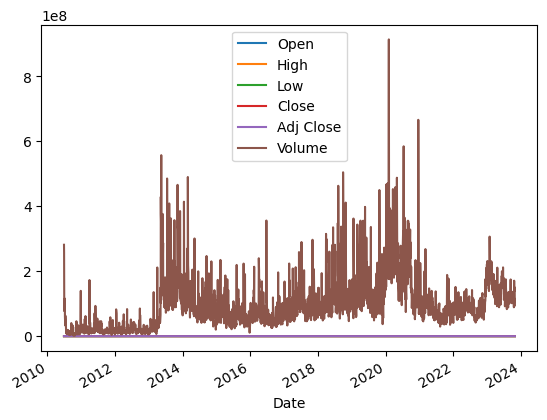

In [21]:
df.plot()

<Axes: xlabel='Date'>

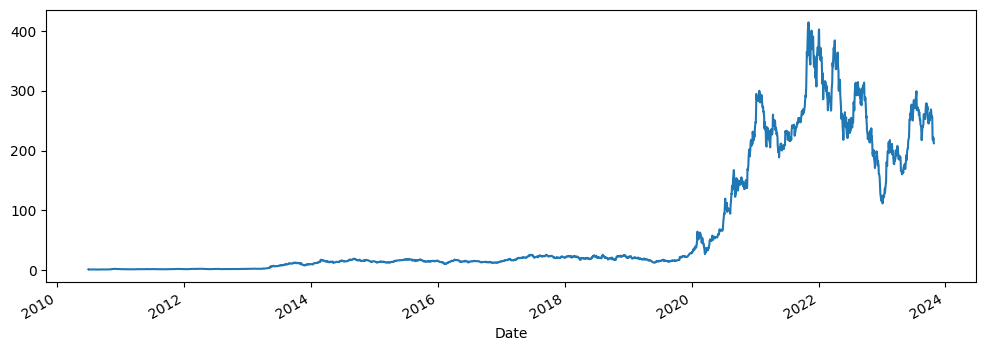

In [23]:
df['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

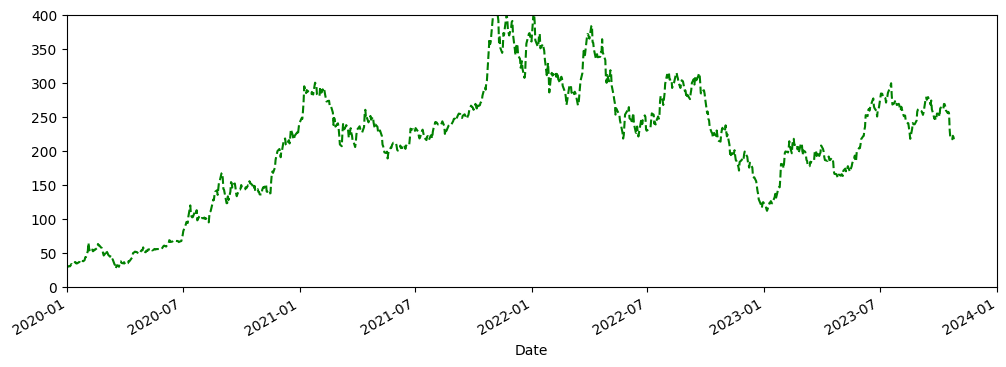

In [34]:
df['High'].plot(xlim=['2020-01-01','2024-01-01'],ylim=[0,400], figsize=(12,4),ls='--', c='green')

In [35]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


In [40]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=3357, freq=None)

In [41]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000


In [43]:
df.iloc[:4,:].index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02'], dtype='datetime64[ns]', name='Date', freq=None)

In [76]:
index = df.loc['2020-01-01':'2020-09-01'].index
share_open = df.loc['2020-01-01':'2020-09-01']['Open']

In [63]:
type(share_open)

pandas.core.series.Series

<Axes: xlabel='Date'>

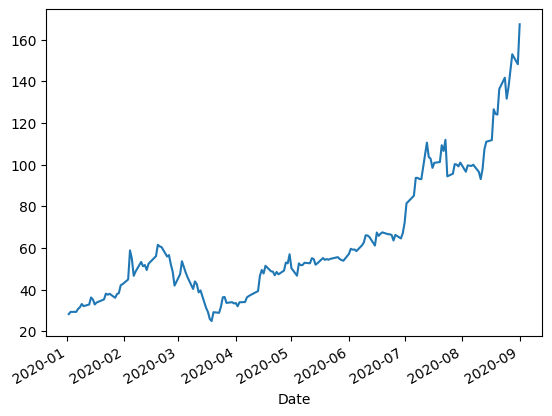

In [72]:
share_open.plot(kind='line')

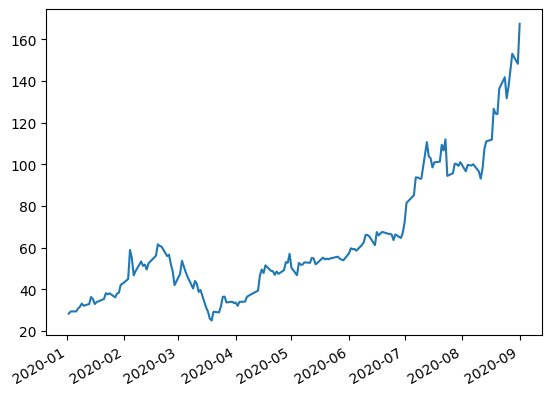

In [80]:
figure, axis = plt.subplots()
# plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [81]:
##DateTime

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3357 entries, 2010-06-29 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3357 non-null   float64
 1   High       3357 non-null   float64
 2   Low        3357 non-null   float64
 3   Close      3357 non-null   float64
 4   Adj Close  3357 non-null   float64
 5   Volume     3357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 312.6 KB


In [87]:
df.reset_index(inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3357 non-null   datetime64[ns]
 1   Open       3357 non-null   float64       
 2   High       3357 non-null   float64       
 3   Low        3357 non-null   float64       
 4   Close      3357 non-null   float64       
 5   Adj Close  3357 non-null   float64       
 6   Volume     3357 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 183.7 KB


In [89]:
pd.to_datetime(df['Date'])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3352   2023-10-23
3353   2023-10-24
3354   2023-10-25
3355   2023-10-26
3356   2023-10-27
Name: Date, Length: 3357, dtype: datetime64[ns]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3357 non-null   datetime64[ns]
 1   Open       3357 non-null   float64       
 2   High       3357 non-null   float64       
 3   Low        3357 non-null   float64       
 4   Close      3357 non-null   float64       
 5   Adj Close  3357 non-null   float64       
 6   Volume     3357 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 183.7 KB


In [92]:
df.set_index(df['Date'], drop=True, inplace=True)

In [95]:
df.drop(columns=['Date'], inplace=True)

In [96]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


In [97]:
df.reset_index(inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3357 non-null   datetime64[ns]
 1   Open       3357 non-null   float64       
 2   High       3357 non-null   float64       
 3   Low        3357 non-null   float64       
 4   Close      3357 non-null   float64       
 5   Adj Close  3357 non-null   float64       
 6   Volume     3357 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 183.7 KB


In [100]:
##DateTime

In [112]:
D = datetime.now()

In [119]:
s = D.strftime("%Y-%m-%d %H:%M:%S")

In [120]:
datetime.strptime(s,"%Y-%m-%d %H:%M:%S" )

datetime.datetime(2023, 10, 29, 19, 16, 51)

In [121]:
date.

NameError: name 'date' is not defined